## Аналитический отчет: Кластерный и факторный анализ социально-экономических показателей стран ЕС

### Цель исследования: 

Выявить скрытые закономерности в данных, сгруппировать страны ЕС по уровню развития и интерпретировать ключевые факторы, влияющие на их социально-экономическое положение

### Для проведения факторного анализа стран ЕС по социально-экономическим показателям будем использовать данные Eurostat 

#### Показатель
##### 1. GDP_per_capita 
##### 2. Unemployment_rate (%) 
##### 3. Life_expectancy 
##### 4. Education_index (0-1) 
##### 5. Gini_index (0-100)
##### 6. Healthcare_expenditure (% of GDP) 
##### 7. Poverty_rate (%) 
##### 8. Innovation_index (0-100)

In [169]:
import pandas as pd

In [170]:
data = {
    'country': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 
               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 
               'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 
               'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 
               'Slovenia', 'Spain', 'Sweden'],
    'gdp_per_capita': [48000, 46000, 11000, 17000, 31000, 26000, 
                      58000, 27000, 48000, 42000, 48000, 20000, 
                      18000, 85000, 35000, 19000, 22000, 115000, 
                      33000, 52000, 18000, 23000, 14000, 21000, 
                      28000, 30000, 52000],
    'unemployment': [4.9, 5.6, 5.2, 7.3, 7.1, 2.9, 
                    4.5, 5.6, 6.8, 7.9, 3.1, 12.8, 
                    3.9, 4.8, 9.0, 6.8, 6.1, 4.8, 
                    3.1, 3.4, 3.0, 6.0, 5.3, 6.1, 
                    4.4, 13.0, 7.4],
    'life_expectancy': [81.5, 81.6, 74.9, 78.2, 82.5, 79.3, 
                      80.9, 78.6, 82.1, 82.7, 81.3, 82.0, 
                      76.3, 82.3, 83.4, 75.1, 75.9, 82.3, 
                      82.6, 81.9, 78.7, 81.9, 75.5, 77.4, 
                      81.3, 83.4, 82.8],
    'education_index': [0.88, 0.87, 0.78, 0.83, 0.85, 0.86, 
                      0.90, 0.87, 0.92, 0.89, 0.92, 0.86, 
                      0.82, 0.90, 0.86, 0.85, 0.87, 0.89, 
                      0.83, 0.91, 0.84, 0.83, 0.76, 0.83, 
                      0.87, 0.87, 0.93],
    'gini_index': [27.0, 25.0, 40.0, 29.0, 31.0, 24.0, 
                  27.0, 30.0, 26.0, 29.0, 30.0, 32.0, 
                  28.0, 29.0, 33.0, 35.0, 36.0, 32.0, 
                  28.0, 26.0, 29.0, 33.0, 35.0, 23.0, 
                  24.0, 33.0, 26.0],
    'health_expenditure': [10.4, 10.2, 7.5, 6.9, 6.8, 7.5, 
                         10.1, 6.7, 9.2, 11.3, 11.7, 7.8, 
                         6.7, 6.7, 8.7, 6.3, 6.8, 5.5, 
                         9.1, 10.1, 6.4, 9.2, 5.6, 7.0, 
                         8.4, 9.0, 11.0],
    'poverty_rate': [12.1, 14.8, 22.0, 18.3, 15.4, 9.6, 
                   12.3, 21.7, 12.0, 13.6, 10.9, 21.4, 
                   12.3, 13.1, 20.3, 22.5, 22.9, 15.4, 
                   16.8, 13.2, 15.0, 17.3, 23.8, 11.9, 
                   12.4, 20.7, 16.0]
}

df = pd.DataFrame(data).set_index('country')

In [171]:
df.head()

,gdp_per_capita,unemployment,life_expectancy,education_index,gini_index,health_expenditure,poverty_rate
country,,,,,,,
Austria,48000,4.9,81.5,0.88,27.0,10.4,12.1
Belgium,46000,5.6,81.6,0.87,25.0,10.2,14.8
Bulgaria,11000,5.2,74.9,0.78,40.0,7.5,22.0
Croatia,17000,7.3,78.2,0.83,29.0,6.9,18.3
Cyprus,31000,7.1,82.5,0.85,31.0,6.8,15.4


### 1. Проведем анализ наших данных

In [172]:
# Describe out data
df.describe().round(2)

,gdp_per_capita,unemployment,life_expectancy,education_index,gini_index,health_expenditure,poverty_rate
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,36555.56,5.96,80.24,0.86,29.63,8.24,16.21
std,23010.59,2.56,2.77,0.04,4.12,1.81,4.28
min,11000.00,2.90,74.90,0.76,23.00,5.50,9.60
25%,20500.00,4.45,78.40,0.84,26.50,6.75,12.35
50%,30000.00,5.60,81.50,0.87,29.00,7.80,15.40
75%,48000.00,6.95,82.30,0.89,32.50,9.65,20.50
max,115000.00,13.00,83.40,0.93,40.00,11.70,23.80


Описательные статистики в норме, аномалий не обнаружено. Двигаемся дальше

### Построение barplot

GDP per capita явялется ключевым экономическим показателем, построим barplot для всех стран   	 	

In [173]:
import matplotlib.pyplot as plt

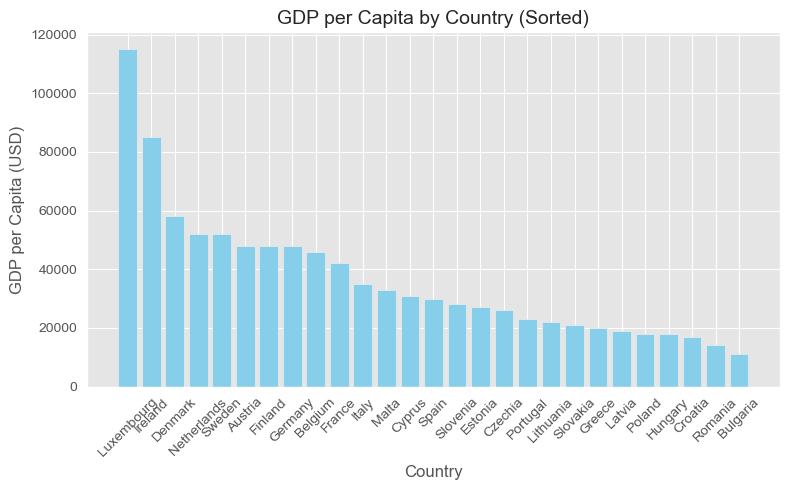

In [174]:
# Сортировка по убыванию GDP
df_sorted = df.sort_values('gdp_per_capita', ascending=False)

# Настройка стиля
plt.style.use('ggplot')

# Создание гистограммы (без значений на столбцах)
plt.figure(figsize=(8, 5))
plt.bar(df_sorted.index, df_sorted['gdp_per_capita'], color='skyblue')

# Подписи осей и заголовка
plt.title('GDP per Capita by Country (Sorted)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.xticks(rotation=45)  # Наклон названий стран

plt.tight_layout()  # Автоподгонка макета
plt.show()

### Histogram 

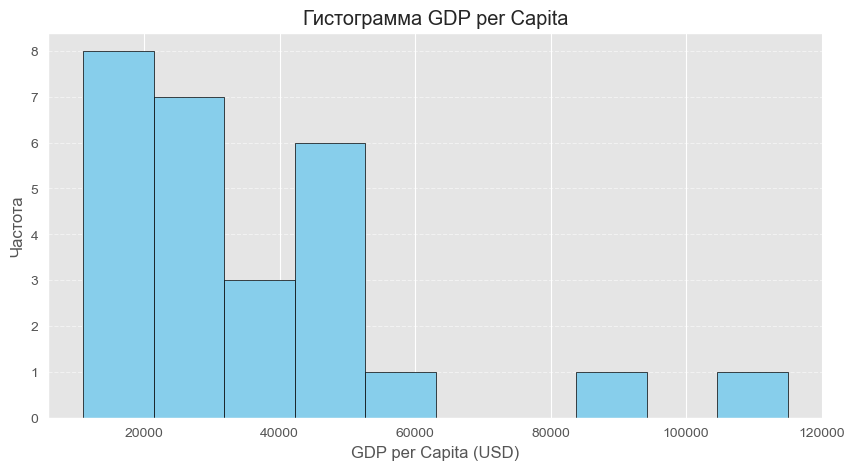

In [175]:
gdp_values = [48000, 46000, 11000, 17000, 31000, 26000, 
              58000, 27000, 48000, 42000, 48000, 20000, 
              18000, 85000, 35000, 19000, 22000, 115000, 
              33000, 52000, 18000, 23000, 14000, 21000, 
              28000, 30000, 52000]

df_hist = pd.DataFrame({'gdp_per_capita': gdp_values}) 

plt.figure(figsize=(10, 5))
plt.hist(df_hist['gdp_per_capita'], bins=10, color='skyblue', edgecolor='black')
plt.title('Гистограмма GDP per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### Видим, что распределение GDP per Capita в странах EC не похоже на нормальное и говорит о разном состоянии экономик, где много стран с низким ВВП и мало стран с высоким

### 2. Построим визуализацию: тепловую карту (heatmap) для выявления связей между переменными 

In [176]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

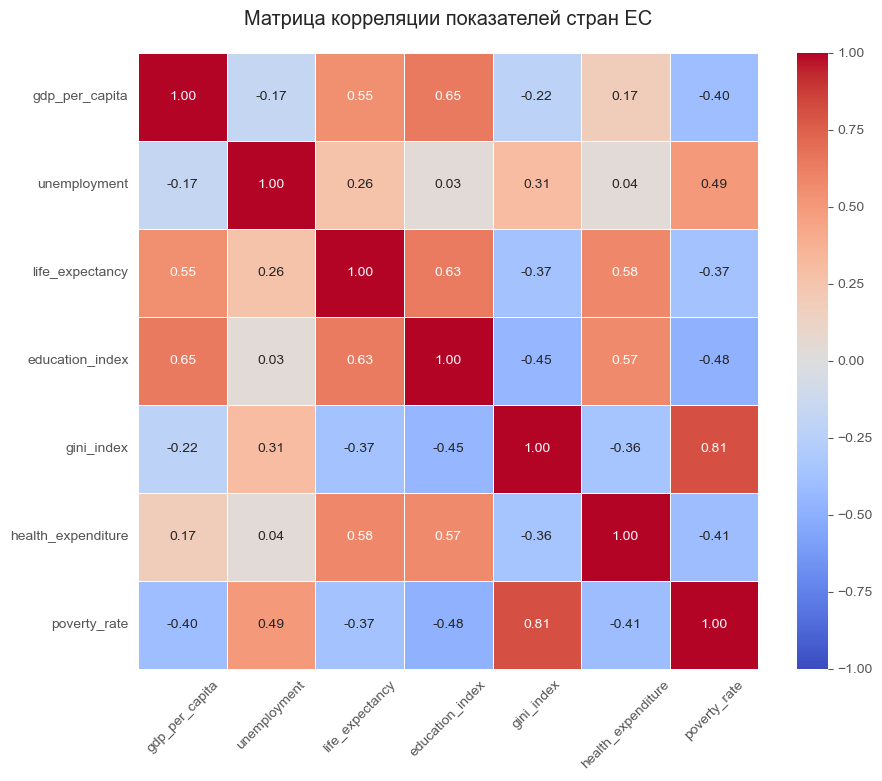

In [177]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # Показать значения в ячейках
    fmt=".2f",       # Формат чисел (2 знака после запятой)
    cmap="coolwarm", # Цветовая схема
    vmin=-1,         # Минимальное значение шкалы
    vmax=1,          # Максимальное значение шкалы
    linewidths=0.5,
)
plt.title("Матрица корреляции показателей стран ЕС", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Тепловая карта корреляций показывает 

#### 1. Сильную положительную связь между gini index и poverty rate (0.81)
   ##### Это означает, что чем выше индекс Джини (неравенство доходов), тем выше уровень бедности в стране
   ##### Что и подтверждает экономическую теорию: при росте неравенства увеличивается доля населения за чертой бедности
   
#### 2. Умеренные положительные связи между  education index и gdp_per_capita (0.65), life_expactancy (0.63), health_expenditure (0.57)
   ##### Это означает, что страны с высоким уровнем образования имеют более высокий ВВП, люди чаще ведут здоровый образ жизни и обращаются к врачам, а также развита система здравоохранения

   
#### 3. Умеренная положительная связь между health_expenditure и life expectancy (0.58) 
   ##### Это означает, что cтраны, которые тратят больше на здравоохранение, имеют более высокую продолжительность жизни
   ##### Однако связь слабее, чем у образования (0.63), что говорит о влиянии других факторов 
   ##### 1. Качество медицины (не только финансирование)
   ##### 2. Образ жизни (питание, экология)

### 3. Проведем Факторный анализ (PCA) 

Применяем метод главных компонент (PCA) для того, чтобы уменьшить размерность данных, выделить главные факторы

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
# Исходные данные (df без столбца 'country', так как он не числовой)
data_to_scale = df.drop(columns=['region'], errors='ignore')  

# Стандартизация
scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(data_to_scale),
    columns=data_to_scale.columns,
    index=data_to_scale.index
)

# Проверка: среднее ~0, std ~1
print(df_standardized.mean().round(2))  # Должно быть близко к 0
print(df_standardized.std().round(2))   # Должно быть близко к 1

gdp_per_capita       -0.0
unemployment         -0.0
life_expectancy      -0.0
education_index      -0.0
gini_index           -0.0
health_expenditure    0.0
poverty_rate         -0.0
dtype: float64
gdp_per_capita        1.02
unemployment          1.02
life_expectancy       1.02
education_index       1.02
gini_index            1.02
health_expenditure    1.02
poverty_rate          1.02
dtype: float64


In [180]:
from sklearn.decomposition import PCA

In [181]:
# Инициализация PCA
pca = PCA()  # По умолчанию n_components = min(n_samples, n_features)

# Обучение модели на стандартизированных данных
pca.fit(df_standardized) 

eigenvalues = pca.explained_variance_
print("Собственные значения:\n", eigenvalues.round(3)) 

explained_variance_ratio = pca.explained_variance_ratio_
print("Доля объясненной дисперсии (%):\n", (explained_variance_ratio * 100).round(2))

Собственные значения:
 [3.525 1.635 0.94  0.557 0.341 0.157 0.114]
Доля объясненной дисперсии (%):
 [48.49 22.49 12.93  7.67  4.69  2.15  1.57]


In [182]:
cumulative_variance = explained_variance_ratio.cumsum()
print("Кумулятивная дисперсия (%):\n", (cumulative_variance * 100).round(2))

Кумулятивная дисперсия (%):
 [ 48.49  70.98  83.91  91.58  96.28  98.43 100.  ]


Мы видим, что первыми 2 факторами объяснено 71% дисперсии данных

### Применим метод scree-plot для определения количества факторов

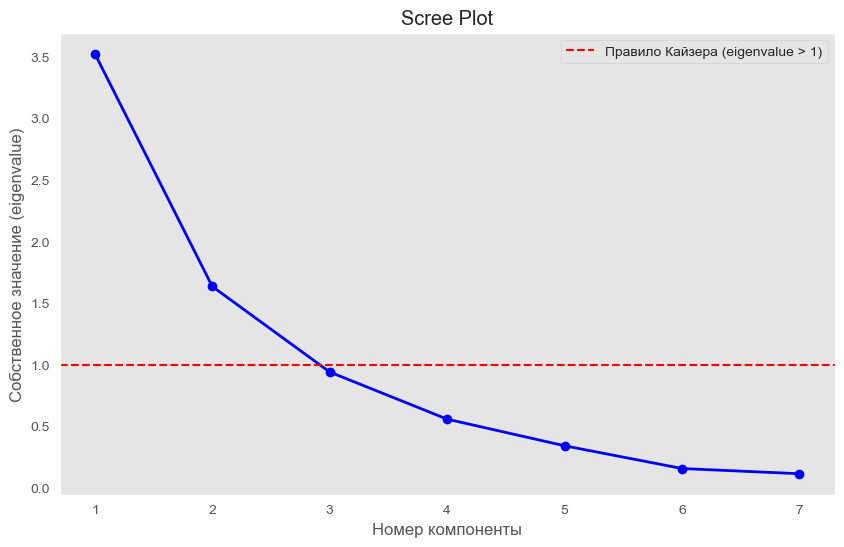

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', label='Правило Кайзера (eigenvalue > 1)')
plt.title('Scree Plot')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение (eigenvalue)')
plt.legend()
plt.grid()
plt.show()

По методу scree-plot выбираем количество факторов равное 2

In [184]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_standardized.columns
)
print("Нагрузки компонент:\n", loadings.round(3))

Нагрузки компонент:
                       PC1    PC2    PC3    PC4    PC5    PC6    PC7
gdp_per_capita      0.362  0.094  0.747  0.019 -0.099 -0.167  0.514
unemployment       -0.109  0.693 -0.213 -0.476  0.182 -0.413  0.178
life_expectancy     0.410  0.398 -0.001 -0.174 -0.632  0.324 -0.371
education_index     0.455  0.217  0.157  0.119  0.721  0.173 -0.397
gini_index         -0.398  0.324  0.326  0.532 -0.147 -0.381 -0.425
health_expenditure  0.366  0.214 -0.502  0.649 -0.070 -0.101  0.362
poverty_rate       -0.435  0.392  0.117  0.155  0.106  0.715  0.312


### Выводы 

#### 1. PC1 
##### PC1 отражает уровень общего социально-экономического развития страны 
##### Мы видим положительную связь с ВВП, продолжительностью жизни, образованием и расходами на здравоохранение и отрицательную связь с неравенством (индекс Джини) и бедностью 

##### Примеры стран 
##### Высокие значения PC1: Германия, Швеция, Нидерланды
##### Низкие значения PC1: Болгария, Румыния 

#### Предлагаемое название компоненты - "Economic well-being and human capital" 

#### 2. PC2 
##### PC2 связана с социальными проблемами и неравенством
##### Мы видим Ввысокую безработицу, бедность и неравенство доходов
##### Также неожиданно появилась положительная связь с продолжительностью жизни, на примере стран, таких как Греция и Испания, возможно мы видим это из-за дополнительных факторов, таких как количество солнечных дней, близость к морю, традиционные системы питания 

##### Примеры стран 
##### Высокие значения PC2: Греция, Испания (высокая безработица + неравенство)
##### Низкие значения PC2: Чехия, Польша (низкая безработица) 

#### Предлагаемое название компоненты - "Social inequality and unemployment"  

### Построим biplot для визуализации получченных результатов 

In [185]:
# PCA с 2 компонентами
pca = PCA(n_components=2)
pca.fit(df_standardized)

# Данные для биплота
loadings = pca.components_.T  # Матрица нагрузок (переменные x компоненты)
scores = pca.transform(df_standardized)  # Координаты стран

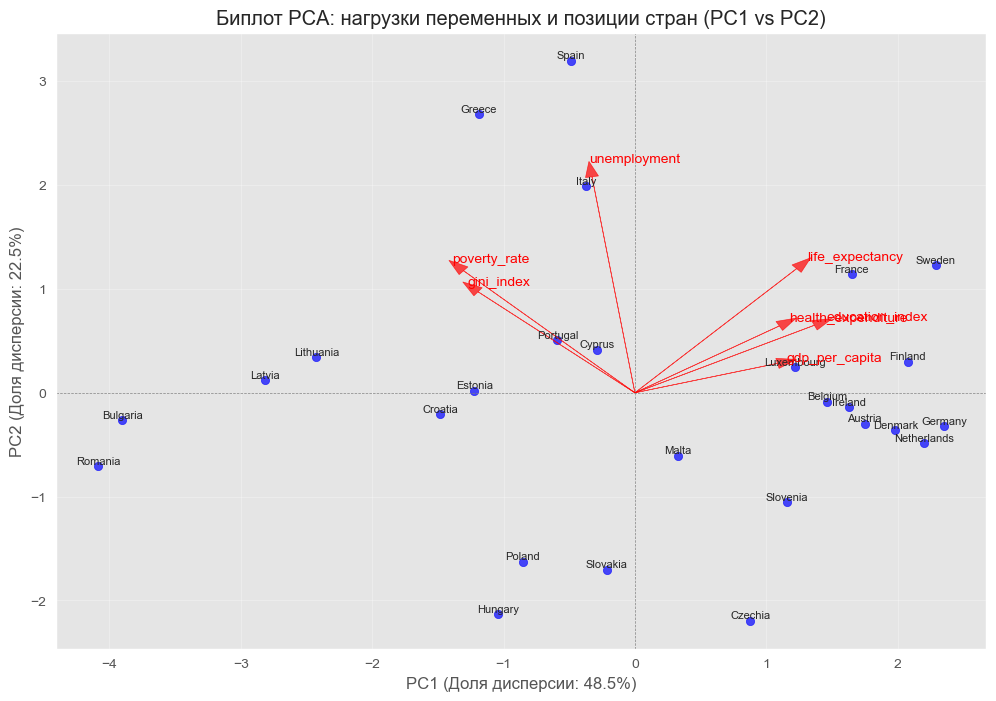

In [186]:
plt.figure(figsize=(12, 8))

# 1. Отрисовка стран (первые две компоненты: PC1 и PC2)
plt.scatter(
    scores[:, 0],  # PC1
    scores[:, 1],  # PC2
    alpha=0.7,
    color='blue'
)

# Подписи стран
for i, country in enumerate(df.index):
    plt.text(scores[i, 0], scores[i, 1], country, fontsize=8, ha='center', va='bottom')

# 2. Отрисовка нагрузок переменных
variables = df.drop(columns=['region'], errors='ignore').columns
for j, var in enumerate(variables):
    plt.arrow(
        0, 0,  # Начало координат
        loadings[j, 0] * 3,  # Умножаем на коэффициент для наглядности
        loadings[j, 1] * 3,
        color='red',
        head_width=0.1,
        alpha=0.7
    )
    plt.text(
        loadings[j, 0] * 3.2,
        loadings[j, 1] * 3.2,
        var,
        color='red',
        fontsize=10
    )

# Настройки графика
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 (Доля дисперсии: {pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 (Доля дисперсии: {pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Биплот PCA: нагрузки переменных и позиции стран (PC1 vs PC2)")
plt.grid(alpha=0.3)
plt.show()

#### Интерпретация 

##### На графике мы видим различные группы стран по социально-экономическим показателями, где unemployment положительно коррелирует с poverty_rate и gini_index, а life_expectancy с education_index, health_expenditure и gdp_per_capita 

##### Также можно видеть как страны группируются в определенные кластеры по этим показателями, для нахождения таких кластеров и применим кластерный анализ методом Иерархическая кластеризация и K-Means

### 4. Кластерный Анализ 

#### 4.1 Иерархическая кластеризация 
##### Иерархическая кластеризация требует матрицы расстояний между странами. Используем евклидово расстояние

In [187]:
from scipy.spatial.distance import pdist, squareform

In [188]:
# Матрица попарных расстояний
distance_matrix = pdist(df_standardized, metric='euclidean')
distance_matrix = squareform(distance_matrix)  # Преобразуем в квадратную матрицу

In [189]:
# Используем scipy.cluster.hierarchy для визуализации 
from scipy.cluster import hierarchy

C:\Users\andrey\AppData\Local\Temp\ipykernel_1572\2745214113.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = hierarchy.linkage(distance_matrix, method='ward')  # Метод Уорда минимизирует дисперсию


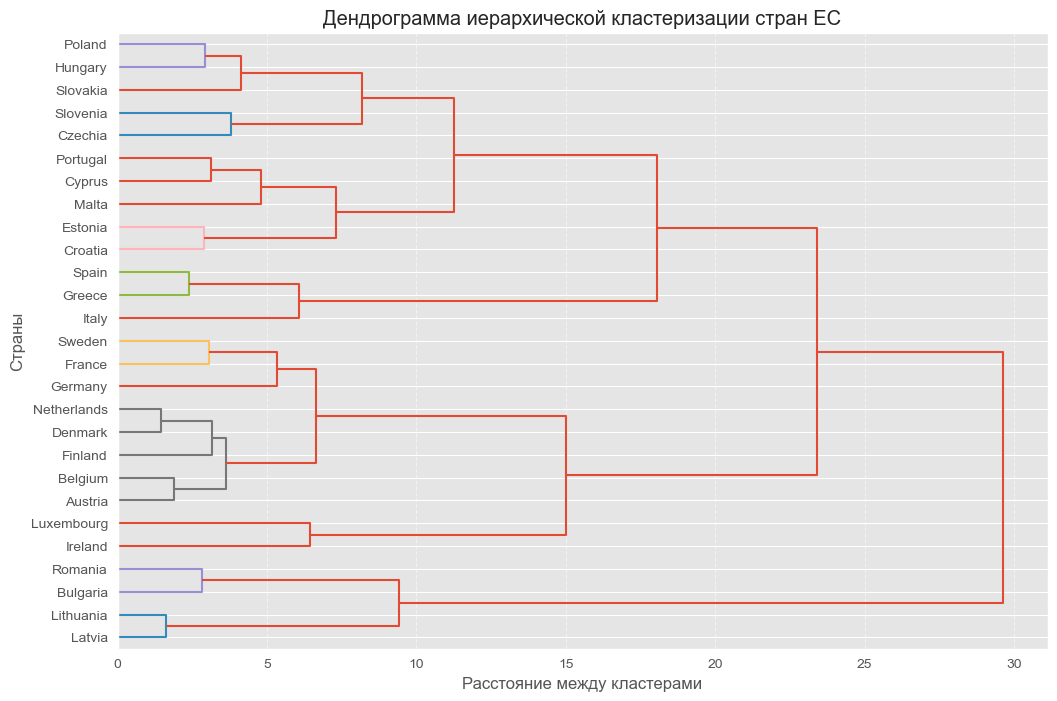

In [190]:
linked = hierarchy.linkage(distance_matrix, method='ward')  # Метод Уорда минимизирует дисперсию

# Дендрограмма
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(
    linked,
    labels=df.index,
    orientation='right',
    leaf_font_size=10,
    color_threshold=4.0  # Порог для выделения кластеров
)
plt.title('Дендрограмма иерархической кластеризации стран ЕС')
plt.xlabel('Расстояние между кластерами')
plt.ylabel('Страны')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

#### По дендрогамме можно разбить страны на различное число кластеров, начиная от 2, заканчивая 14
#### Применим метод камянистой осыпи для визуализации выбора количества кластеров 

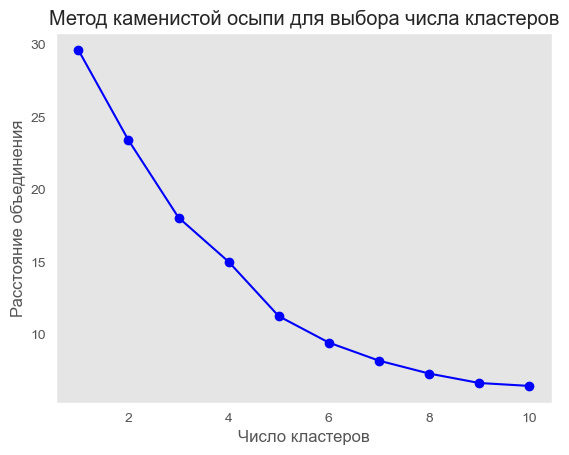

In [191]:
last_merges = linked[-10:, 2]  # Последние 10 расстояний объединения
plt.plot(range(1, len(last_merges)+1), last_merges[::-1], 'bo-')
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние объединения')
plt.title('Метод каменистой осыпи для выбора числа кластеров')
plt.grid()
plt.show()

#### По методу каменистой осыпи можно выделить 5 либо 6 кластеров, построим визуализацию для двух случаев

In [192]:
from scipy.cluster.hierarchy import fcluster

In [193]:
# Разбиваем на 5 кластеров
clusters = fcluster(linked, t=5, criterion='maxclust')

# Добавляем метки кластеров в DataFrame
df_clustered = df.copy()
df_clustered['cluster'] = clusters
print(df_clustered[['cluster']].sort_values('cluster'))

             cluster
country             
Romania            1
Bulgaria           1
Lithuania          1
Latvia             1
Ireland            2
Luxembourg         2
Netherlands        3
Germany            3
France             3
Austria            3
Sweden             3
Denmark            3
Belgium            3
Finland            3
Greece             4
Spain              4
Italy              4
Slovenia           5
Slovakia           5
Portugal           5
Estonia            5
Croatia            5
Cyprus             5
Czechia            5
Hungary            5
Poland             5
Malta              5


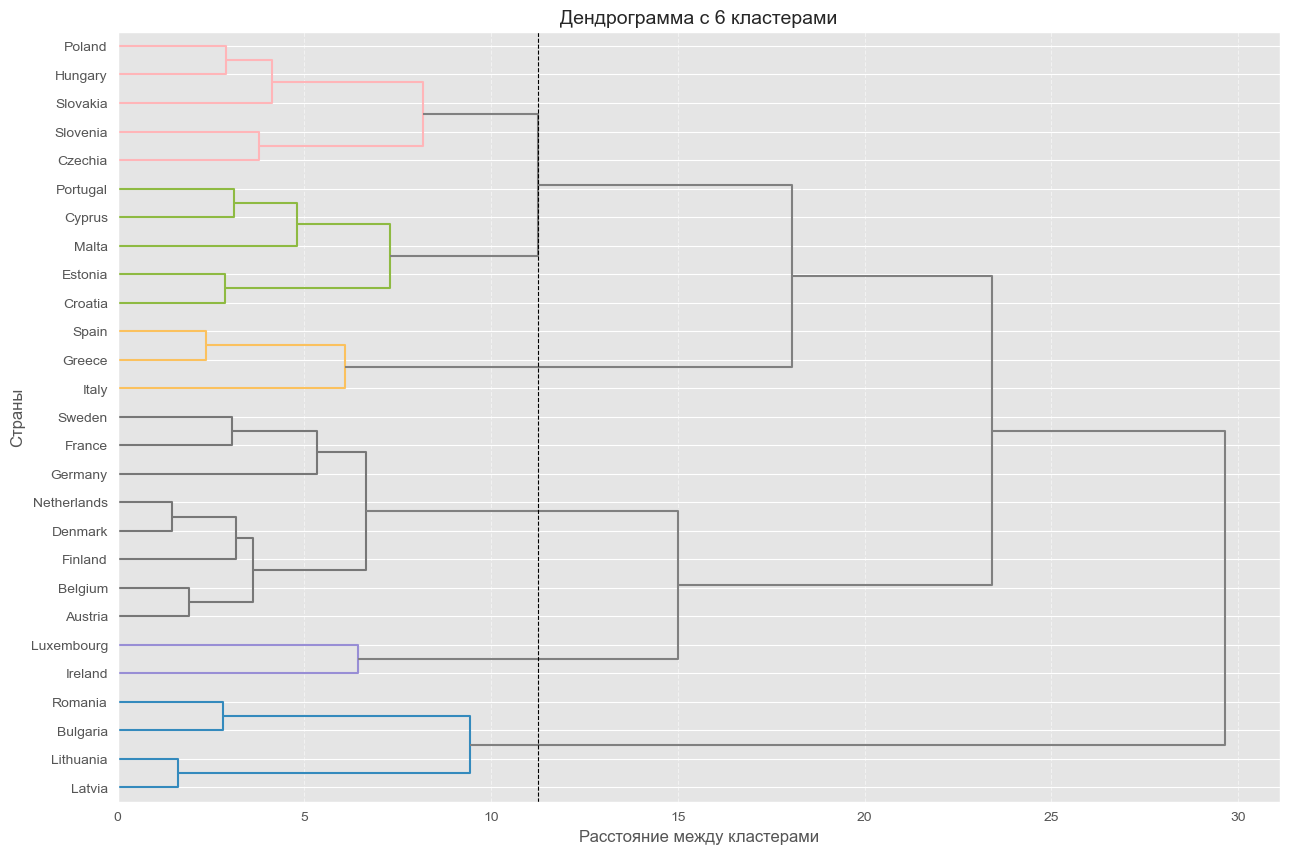

In [194]:
plt.figure(figsize=(15, 10))
dendrogram = hierarchy.dendrogram(
    linked,
    labels=df.index,
    orientation='right',
    leaf_font_size=10,
    color_threshold=threshold,  # Автоматический порог
    above_threshold_color='grey'  # Цвет для несгруппированных элементов
)
plt.title(f'Дендрограмма с {num_clusters} кластерами', fontsize=14)
plt.axvline(x=threshold, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('Расстояние между кластерами')
plt.ylabel('Страны')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [195]:
# Разбиваем на 6 кластеров
clusters = fcluster(linked, t=6, criterion='maxclust')

# Добавляем метки кластеров в DataFrame
df_clustered = df.copy()
df_clustered['cluster'] = clusters
print(df_clustered[['cluster']].sort_values('cluster'))

             cluster
country             
Romania            1
Bulgaria           1
Lithuania          1
Latvia             1
Ireland            2
Luxembourg         2
Netherlands        3
Germany            3
France             3
Austria            3
Sweden             3
Belgium            3
Denmark            3
Finland            3
Greece             4
Spain              4
Italy              4
Portugal           5
Croatia            5
Estonia            5
Cyprus             5
Malta              5
Poland             6
Czechia            6
Hungary            6
Slovakia           6
Slovenia           6


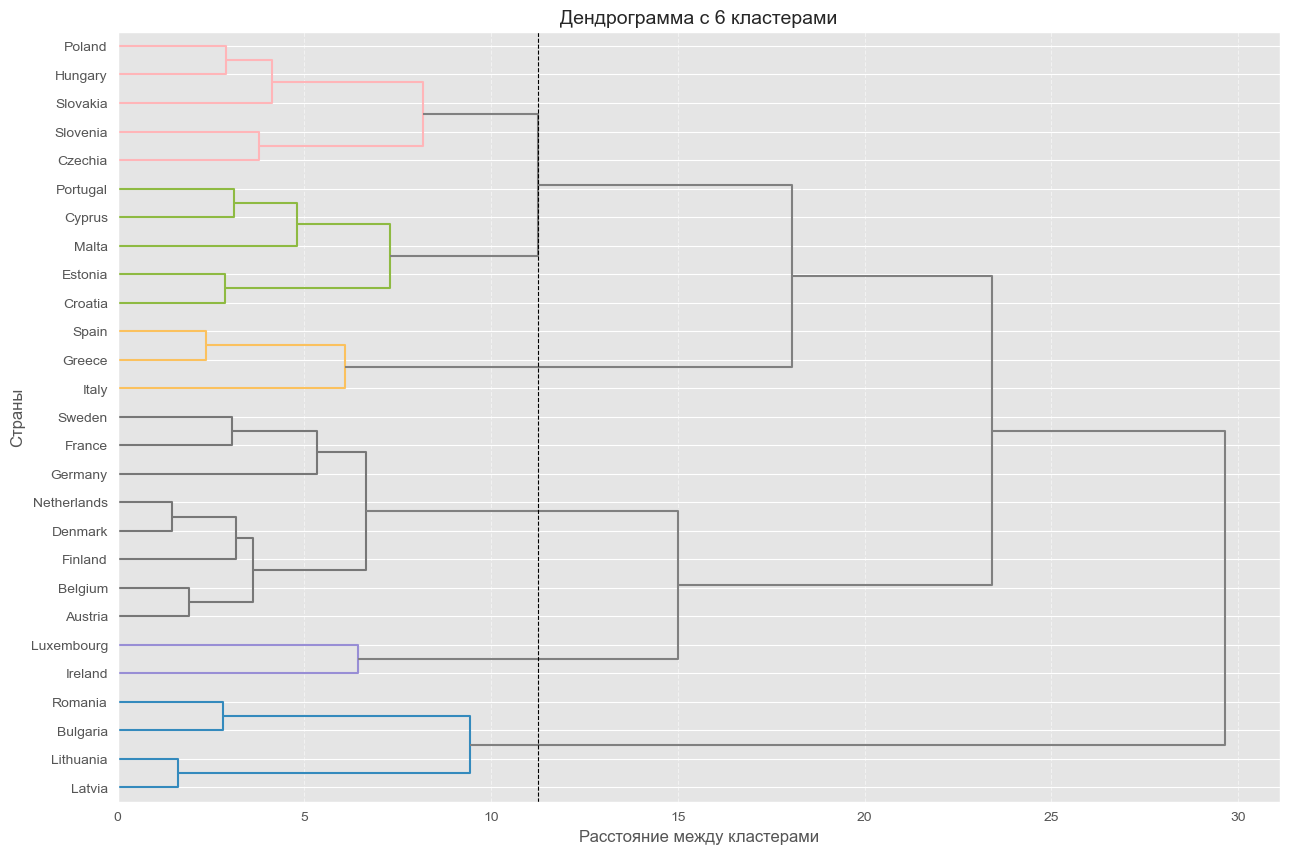

In [196]:
# Построение дендрограммы
plt.figure(figsize=(15, 10))
dendrogram = hierarchy.dendrogram(
    linked,
    labels=df.index,
    orientation='right',
    leaf_font_size=10,
    color_threshold=threshold,  # Убедитесь, что threshold соответствует 6 кластерам
    above_threshold_color='grey'
)
plt.title(f'Дендрограмма с 6 кластерами', fontsize=14)
plt.axvline(x=threshold, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('Расстояние между кластерами')
plt.ylabel('Страны')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

##### Такие страны как Польша, Венгрия, Словакия в сравнении с Португалией, Эстонией, Хорватией будут иметь похожие физико-географические и социально-экономические показатели
##### Поэтому оптимальным числом кластером выберем 5

Зная, что оптимальное число кластеров равно 5, применим метод K-Means

#### 4.2 Метод K-Means

#### Будем считать оптимальное K=5 

In [197]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [198]:
# PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df.index)

In [199]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

# Добавляем метки кластеров в DataFrame
df_kmeans = df.copy()
df_kmeans['cluster'] = clusters
print(df_kmeans[['cluster']].sort_values('cluster'))

             cluster
country             
Germany            0
Portugal           1
Italy              1
Spain              1
Croatia            1
Cyprus             1
Greece             1
Estonia            1
Hungary            2
Malta              2
Slovakia           2
Czechia            2
Slovenia           2
Poland             2
Romania            3
Bulgaria           3
Latvia             3
Lithuania          3
Austria            4
Ireland            4
Luxembourg         4
France             4
Finland            4
Denmark            4
Belgium            4
Netherlands        4
Sweden             4


C:\Users\andrey\anaconda3\envs\pandas_in_action\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


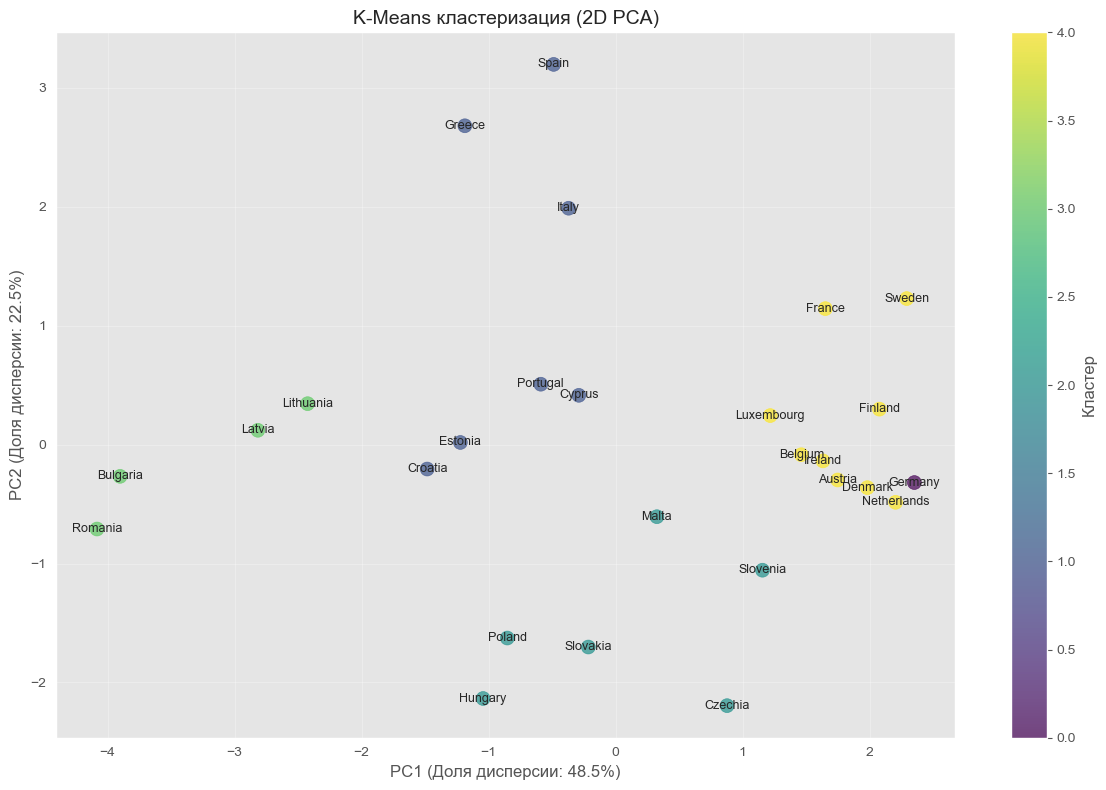

In [200]:
# 5. Визуализация в пространстве PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_pca['PC1'], 
    df_pca['PC2'],
    c=df_kmeans['cluster'], 
    cmap='viridis',
    s=100,
    alpha=0.7
) 

# Добавляем подписи стран
for i, country in enumerate(df_pca.index):
    plt.text(df_pca.iloc[i, 0], df_pca.iloc[i, 1], country, fontsize=9, ha='center', va='center')

plt.title('K-Means кластеризация (2D PCA)', fontsize=14)
plt.xlabel(f'PC1 (Доля дисперсии: {pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 (Доля дисперсии: {pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.colorbar(scatter, label='Кластер')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### В данном кластерном анализе методом K-Means мы приняли K=5, разделение стран на 5 кластеров хорошо описывает наши данные и группирует страны по двум факторам, где 
##### PC1 это "Economic well-being and human capital" 
##### PC2 это "Social inequality and unemployment" 

##### Страны в данных кластерах являются схожими в социально-экономических показателях 
##### Следует заметить, что данный метод выделил Германию в отдельный кластер по нескольким факторам
##### 1. Высокий ВВП на душу населения: У Германии один из самых высоких показателей в ЕС (∼$48,000), что сильно влияет на PC1 
##### 2. Низкая безработица (3.1%): Лучший показатель среди крупных экономик 
##### 3. Умеренное неравенство (Gini 30.0)

#### Но Германия очень похожа по различным показателям с такими странами как Австрия, Бельгия, Франция и другие из близлежащего кластера, поэтому оптимальным числом K примем равное 4

In [201]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

# Добавляем метки кластеров в DataFrame
df_kmeans = df.copy()
df_kmeans['cluster'] = clusters
print(df_kmeans[['cluster']].sort_values('cluster'))

             cluster
country             
Austria            0
Netherlands        0
Luxembourg         0
Germany            0
France             0
Finland            0
Ireland            0
Sweden             0
Belgium            0
Denmark            0
Portugal           1
Italy              1
Spain              1
Estonia            1
Greece             1
Croatia            1
Cyprus             1
Malta              2
Poland             2
Czechia            2
Slovakia           2
Slovenia           2
Hungary            2
Latvia             3
Bulgaria           3
Romania            3
Lithuania          3


C:\Users\andrey\anaconda3\envs\pandas_in_action\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


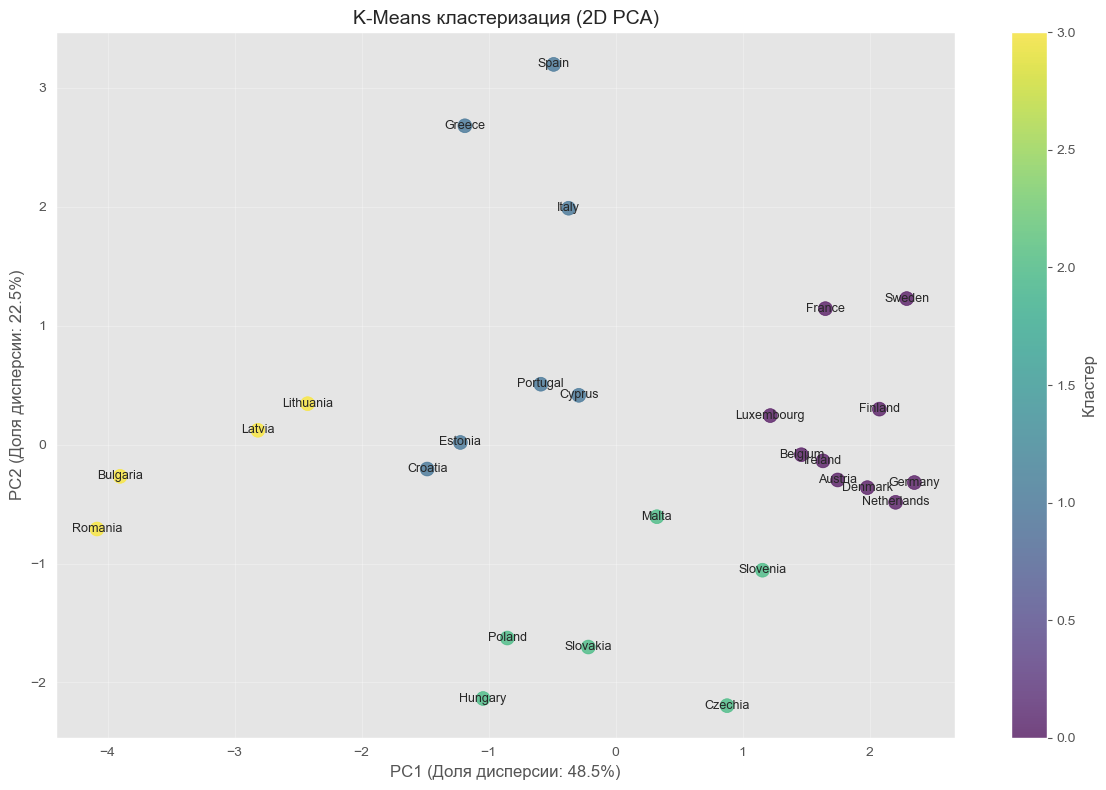

In [202]:
# 5. Визуализация в пространстве PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_pca['PC1'], 
    df_pca['PC2'],
    c=df_kmeans['cluster'], 
    cmap='viridis',
    s=100,
    alpha=0.7
) 

# Добавляем подписи стран
for i, country in enumerate(df_pca.index):
    plt.text(df_pca.iloc[i, 0], df_pca.iloc[i, 1], country, fontsize=9, ha='center', va='center')

plt.title('K-Means кластеризация (2D PCA)', fontsize=14)
plt.xlabel(f'PC1 (Доля дисперсии: {pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 (Доля дисперсии: {pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.colorbar(scatter, label='Кластер')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Данный график отлично описывает наши данные и группирует схожие страны в один кластер 

### Выводы 
#### Таким образом результаты кластерного анализа для метода иерархической кластеризации и метода K-Means незначительно различаются, что являетя нормальной практикой, построим дополнительную визуализацию 

### Подготовка данных для визуализации

#### Заменим значение количества кластеров с 6 на 4 по результатам K-Means

In [214]:
df_clustered['cluster'] = df_kmeans['cluster']
df_clustered.head()

,gdp_per_capita,unemployment,life_expectancy,education_index,gini_index,health_expenditure,poverty_rate,cluster
country,,,,,,,,
Austria,48000,4.9,81.5,0.88,27.0,10.4,12.1,0
Belgium,46000,5.6,81.6,0.87,25.0,10.2,14.8,0
Bulgaria,11000,5.2,74.9,0.78,40.0,7.5,22.0,3
Croatia,17000,7.3,78.2,0.83,29.0,6.9,18.3,1
Cyprus,31000,7.1,82.5,0.85,31.0,6.8,15.4,1


C:\Users\andrey\AppData\Local\Temp\ipykernel_1572\308441432.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y='gdp_per_capita', palette=cluster_palette)
C:\Users\andrey\AppData\Local\Temp\ipykernel_1572\308441432.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y='gini_index', palette=cluster_palette)
C:\Users\andrey\AppData\Local\Temp\ipykernel_1572\308441432.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x='cluster', y='education_index', palet

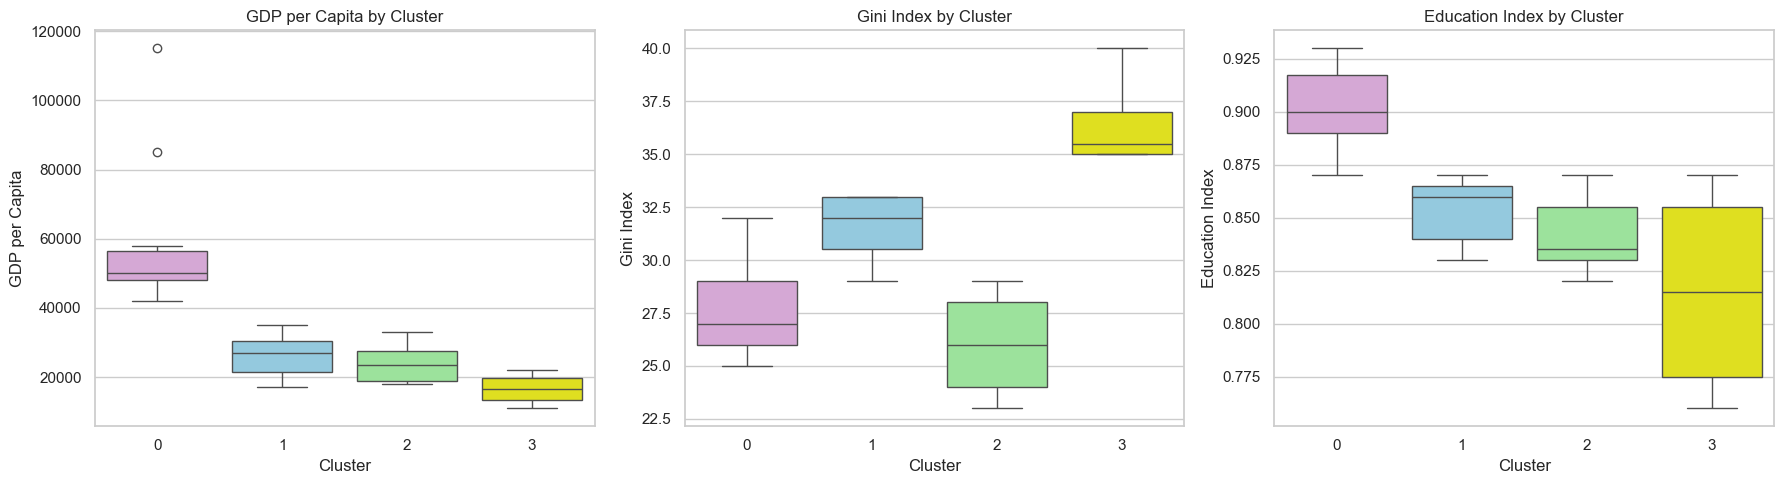

In [221]:
# Установим стиль
sns.set(style='whitegrid')

# Определим цветовую палитру для кластеров вручную
cluster_palette = {
    '0': 'plum',
    '1': 'skyblue',
    '2': 'lightgreen',
    '3': 'yellow',
}

# Размер общей фигуры
plt.figure(figsize=(18, 5))

# 1. GDP per capita
plt.subplot(1, 3, 1)
sns.boxplot(data=df_clustered, x='cluster', y='gdp_per_capita', palette=cluster_palette)
plt.title('GDP per Capita by Cluster')
plt.xlabel('Cluster')
plt.ylabel('GDP per Capita')

# 2. Gini index
plt.subplot(1, 3, 2)
sns.boxplot(data=df_clustered, x='cluster', y='gini_index', palette=cluster_palette)
plt.title('Gini Index by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gini Index')

# 3. Education Index
plt.subplot(1, 3, 3)
sns.boxplot(data=df_clustered, x='cluster', y='education_index', palette=cluster_palette)
plt.title('Education Index by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Education Index')

# Отображение всех графиков
plt.tight_layout()
plt.show()

#### На данных графиках мы видим отчетливые различия между кластерами, что позволяет нам сделать вывод о правильности выбранного количества кластеров